In [1]:
import numpy as np
import matplotlib.pyplot as pl

%matplotlib inline

In [2]:
import tensorflow as tf

Just some tests

In [ ]:
x_np = np.array([1, 1], dtype = "float")

In [ ]:
M_np = np.diag([1, 10])
M_np

In [ ]:
np.einsum("i,ij,j", x_np, M_np, x_np)

### Define our function

In [3]:
tf.reset_default_graph()

In [4]:
x = tf.Variable([1, 1], dtype = "float", name="x")

In [5]:
M = tf.diag([1.0, 10.0],  name = "M")

In [6]:
f = tf.einsum("i,ij,j", x, M, x)

In [7]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [8]:
sess.run(f)

11.0

In [9]:
sess.close()

# Training
### Gradient descent

In [70]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.095)

In [71]:
n_steps = tf.Variable(0, "n_steps")

In [72]:
train_step = optimizer.minimize(loss = f, global_step=n_steps, name = "train_step")

In [73]:
grad = optimizer.compute_gradients(loss = f)
grad

[(<tf.Tensor 'gradients_5/AddN:0' shape=(2,) dtype=float32>,
  <tf.Variable 'x:0' shape=(2,) dtype=float32_ref>),
 (None, <tf.Variable 'Variable:0' shape=() dtype=int32_ref>),
 (None, <tf.Variable 'Variable_1:0' shape=() dtype=int32_ref>),
 (None, <tf.Variable 'Variable_2:0' shape=() dtype=int32_ref>)]

In [74]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [75]:
sess.run(grad[0])

(array([  2.,  20.], dtype=float32), array([ 1.,  1.], dtype=float32))

In [76]:
x_vals = [sess.run(x)]

In [98]:
for i in range(20):
    sess.run(train_step)
    x_val = sess.run(x)
    x_vals.append(x_val)
    print("n =", sess.run(n_steps), 
          "; x =", x_val, 
          "; f =", sess.run(f, feed_dict={x: x_val}),
          "; grad f =", sess.run(grad[0])[0]
    )

n = 22 ; x = [ 0.00969774  0.09847704] ; f = 0.0970713 ; grad f = [ 0.01939548  1.96954072]


In [101]:
sess.close()

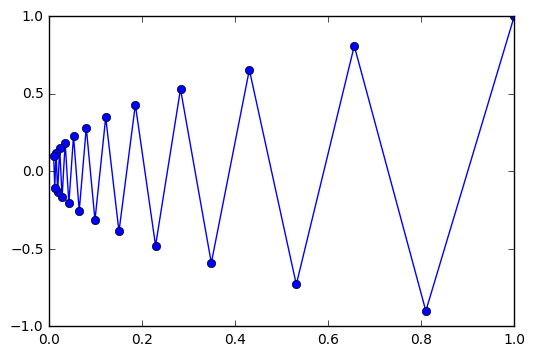

In [100]:
x_vals = np.array(x_vals)
xxx, yyy = x_vals.T 
pl.plot(xxx, yyy, "bo-")


## Using `scipy.optimize`

In [104]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [102]:
import scipy.optimize as sc_opt

In [121]:
def tf_to_fun(tf_fun):
    def fun( x_val): 
        return sess.run(tf_fun, 
            feed_dict= { x: x_val}
        )
    
    return fun

In [127]:
tf_to_fun(f)([1, 2])

41.0

In [126]:
sc_opt.fmin(func = tf_to_fun(f), x0 = [1, 2])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 48
         Function evaluations: 92


array([ -2.44018034e-05,  -5.10162956e-06])

Tensorflow enables us to calculate the gradient and Hessian matrix of $f$ that we can then feed to `scipy.optimize` methods.

In [119]:
grad_f = tf.gradients(f, [x])[0]
hess_f = tf.hessians(f, [x])[0]

In [129]:
print("grad f =", sess.run(grad_f))
print("Hess f =", sess.run(hess_f))

grad f = [  2.  20.]
Hess f = [[  2.   0.]
 [  0.  20.]]


In [133]:
sc_opt.minimize(fun = tf_to_fun(f), x0 = [1, 2], method = "Newton-CG", 
                jac = tf_to_fun(grad_f))

     fun: 0.012281016446650028
     jac: array([-0.31829447, -0.23991564], dtype=float32)
 message: "Warning: CG iterations didn't converge.  The Hessian is not positive definite."
    nfev: 4
    nhev: 0
     nit: 3
    njev: 99
  status: 3
 success: False
       x: array([-0.11081086,  0.00044385])

In [132]:
sc_opt.minimize(fun = tf_to_fun(f), x0 = [1, 2], method = "Newton-CG", 
                jac = tf_to_fun(grad_f), 
                hess= tf_to_fun(hess_f))

     fun: 1.5585406e-19
     jac: array([ -6.98491931e-10,  -1.16415322e-09], dtype=float32)
 message: 'Optimization terminated successfully.'
    nfev: 6
    nhev: 5
     nit: 5
    njev: 10
  status: 0
 success: True
       x: array([ -3.49245965e-10,  -5.82076609e-11])